In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
stock=pd.read_excel('Company stock prices.xlsx')
stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-19,537.070007,541.799988,525.380005,530.719971,530.719971,7567500
1,2020-10-20,528.140015,533.780029,522.260010,525.419983,525.419983,10047200
2,2020-10-21,501.029999,506.850006,488.250000,489.049988,489.049988,17405700
3,2020-10-22,494.690002,495.140015,482.000000,485.230011,485.230011,6997900
4,2020-10-23,488.109985,490.059998,481.350006,488.279999,488.279999,4927900
...,...,...,...,...,...,...,...
748,2023-10-10,385.579987,388.700012,372.250000,373.320007,373.320007,7288900
749,2023-10-11,372.779999,377.809998,365.339996,365.929993,365.929993,9151400
750,2023-10-12,366.480011,368.829987,359.049988,361.200012,361.200012,7376100
751,2023-10-13,355.640015,358.929993,352.049988,355.679993,355.679993,6312600


In [ ]:
stock['Date'] = pd.to_datetime(stock['Date'])

In [ ]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

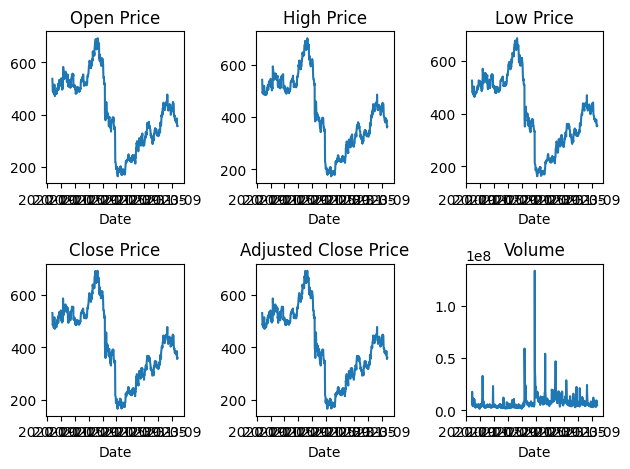

In [ ]:
# Open
plt.subplot(2, 3, 1)
plt.plot(stock['Date'], stock['Open'])
plt.title('Open Price')
plt.xlabel('Date')

# High
plt.subplot(2, 3, 2)
plt.plot(stock['Date'], stock['High'])
plt.title('High Price')
plt.xlabel('Date')

# Low
plt.subplot(2, 3, 3)
plt.plot(stock['Date'], stock['Low'])
plt.title('Low Price')
plt.xlabel('Date')

# Close
plt.subplot(2, 3, 4)
plt.plot(stock['Date'], stock['Close'])
plt.title('Close Price')
plt.xlabel('Date')

# Adj Close
plt.subplot(2, 3, 5)
plt.plot(stock['Date'], stock['Adj Close'])
plt.title('Adjusted Close Price')
plt.xlabel('Date')

# Volume
plt.subplot(2, 3, 6)
plt.plot(stock['Date'], stock['Volume'])
plt.title('Volume')
plt.xlabel('Date')

plt.tight_layout()
plt.show()


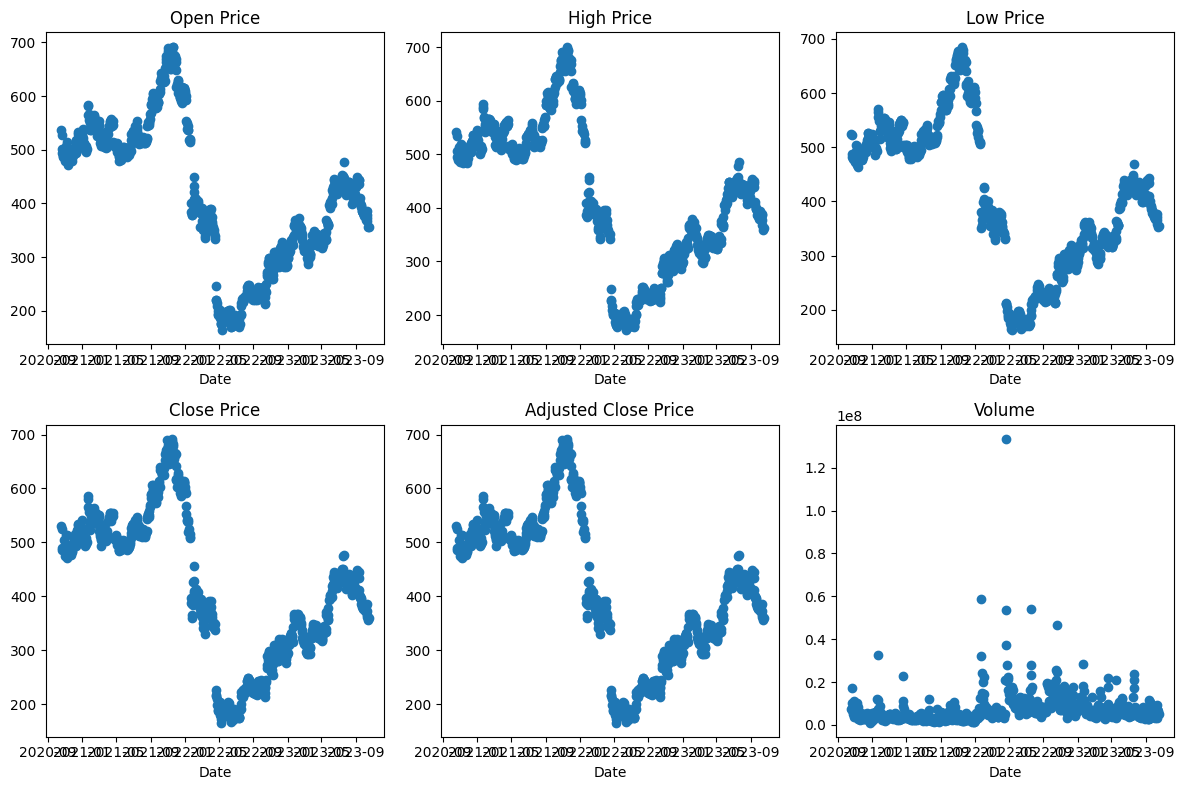

In [ ]:
plt.figure(figsize=(12, 8))

# Open
plt.subplot(2, 3, 1)
plt.scatter(stock['Date'], stock['Open'])
plt.title('Open Price')
plt.xlabel('Date')

# High
plt.subplot(2, 3, 2)
plt.scatter(stock['Date'], stock['High'])
plt.title('High Price')
plt.xlabel('Date')

# Low
plt.subplot(2, 3, 3)
plt.scatter(stock['Date'], stock['Low'])
plt.title('Low Price')
plt.xlabel('Date')

# Close
plt.subplot(2, 3, 4)
plt.scatter(stock['Date'], stock['Close'])
plt.title('Close Price')
plt.xlabel('Date')

# Adj Close
plt.subplot(2, 3, 5)
plt.scatter(stock['Date'], stock['Adj Close'])
plt.title('Adjusted Close Price')
plt.xlabel('Date')

# Volume
plt.subplot(2, 3, 6)
plt.scatter(stock['Date'], stock['Volume'])
plt.title('Volume')
plt.xlabel('Date')

plt.tight_layout()
plt.show()

In [ ]:
stock_1=stock.drop(['Open','High','Low','Adj Close','Volume'],axis=1)
stock_1

,Date,Close
0,2020-10-19,530.719971
1,2020-10-20,525.419983
2,2020-10-21,489.049988
3,2020-10-22,485.230011
4,2020-10-23,488.279999
...,...,...
748,2023-10-10,373.320007
749,2023-10-11,365.929993
750,2023-10-12,361.200012
751,2023-10-13,355.679993


In [ ]:
stock_1 = stock_1.sort_values(by='Date')
print(stock_1.head())

        Date       Close
0 2020-10-19  530.719971
1 2020-10-20  525.419983
2 2020-10-21  489.049988
3 2020-10-22  485.230011
4 2020-10-23  488.279999


In [ ]:
stock_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 752
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    753 non-null    datetime64[ns]
 1   Close   753 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.6 KB


In [ ]:
stock_1['Close'].describe()

count    753.000000
mean     414.796653
std      134.669664
min      166.369995
25%      313.480011
50%      416.029999
75%      519.780029
max      691.690002
Name: Close, dtype: float64

**DATA VISUALIZATION**

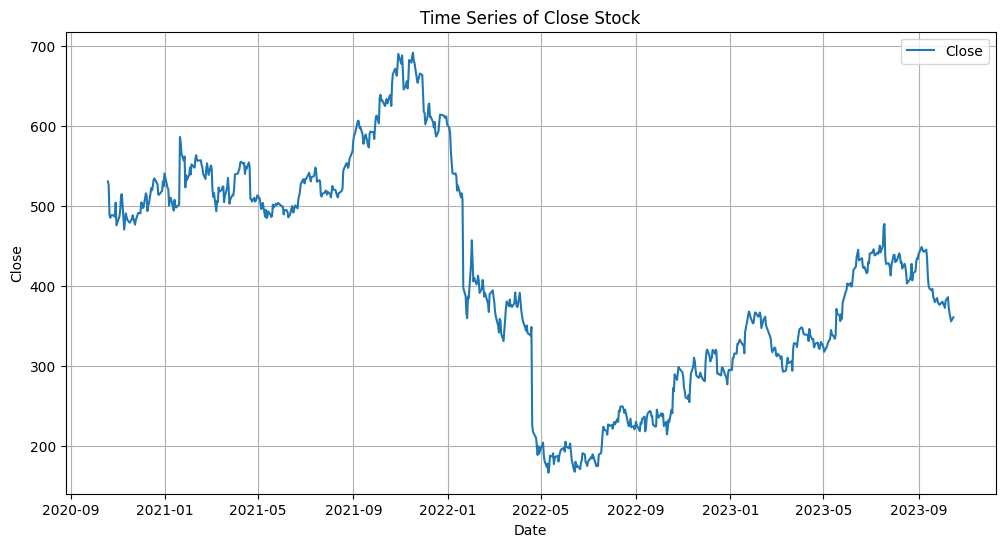

In [ ]:
import matplotlib.pyplot as plt

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(stock_1['Date'], stock_1['Close'], label='Close')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Time Series of Close Stock')
plt.legend()
plt.grid(True)
plt.show()

It is not stationary

**ADF Test**

In [ ]:
from statsmodels.tsa.stattools import adfuller
close_data = stock_1['Close']

# Perform the ADF test
result = adfuller(close_data)

print("ADF Statistic: %f" % result[0])
print("p-value: %f" % result[1])
print("Critical Values:")
for key, value in result[4].items():
    print("\t%s: %.3f" % (key, value))

ADF Statistic: -1.320806
p-value: 0.619601
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [ ]:
if result[1] <= 0.05:
    print("The time series is stationary (reject the null hypothesis)")
else:
    print("The time series is non-stationary (fail to reject the null hypothesis)")

The time series is non-stationary (fail to reject the null hypothesis)


By ADF test, it is clear that the data is not stationary distributed.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
diff_order = 1

In [ ]:
data_diff = stock_1.diff(periods=diff_order).dropna()

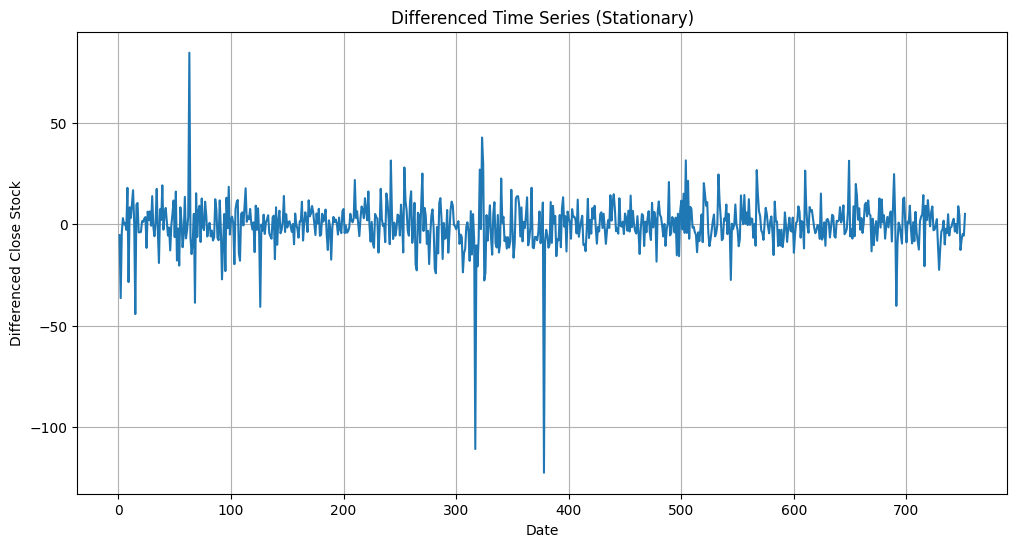

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data_diff.index, data_diff['Close'])
plt.xlabel('Date')
plt.ylabel('Differenced Close Stock')
plt.title('Differenced Time Series (Stationary)')
plt.grid(True)
plt.show()

So, by differencing of order 1, data became stationary.

**ADF Test**

In [ ]:
from statsmodels.tsa.stattools import adfuller
close_data_diff = data_diff['Close']

result_diff = adfuller(close_data_diff)

print("ADF Statistic: %f" % result_diff[0])
print("p-value: %f" % result_diff[1])
print("Critical Values:")
for key, value in result_diff[4].items():
    print("\t%s: %.3f" % (key, value))

ADF Statistic: -26.634567
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [ ]:
if result_diff[1] <= 0.05:
    print("The time series is stationary (reject the null hypothesis)")
else:
    print("The time series is non-stationary (fail to reject the null hypothesis)")

The time series is stationary (reject the null hypothesis)


By ADF test, it is clear that the differenced data is stationary

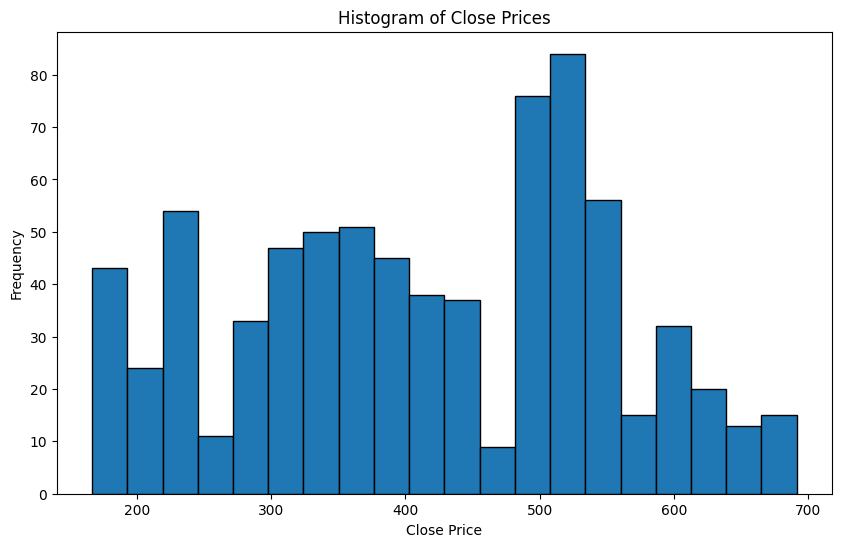

In [ ]:
close_data = stock_1['Close']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(close_data, bins=20, edgecolor='k')

plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Histogram of Close Prices')

plt.show()

It is not normally distributed.

In [ ]:
from scipy.stats import kstest, norm
mu, sigma = np.mean(close_data), np.std(close_data)
ks_statistic, ks_p_value = kstest(close_data, 'norm', args=(mu, sigma))
alpha = 0.05
print("KS Statistic:", ks_statistic)
print("P-Value:", ks_p_value)

KS Statistic: 0.10589010591193604
P-Value: 8.325572212096839e-08


In [ ]:
if ks_p_value < alpha:
    print("The data does not follow a normal distribution (reject the null hypothesis)")
else:
    print("The data follows a normal distribution (fail to reject the null hypothesis)")

The data does not follow a normal distribution (reject the null hypothesis)


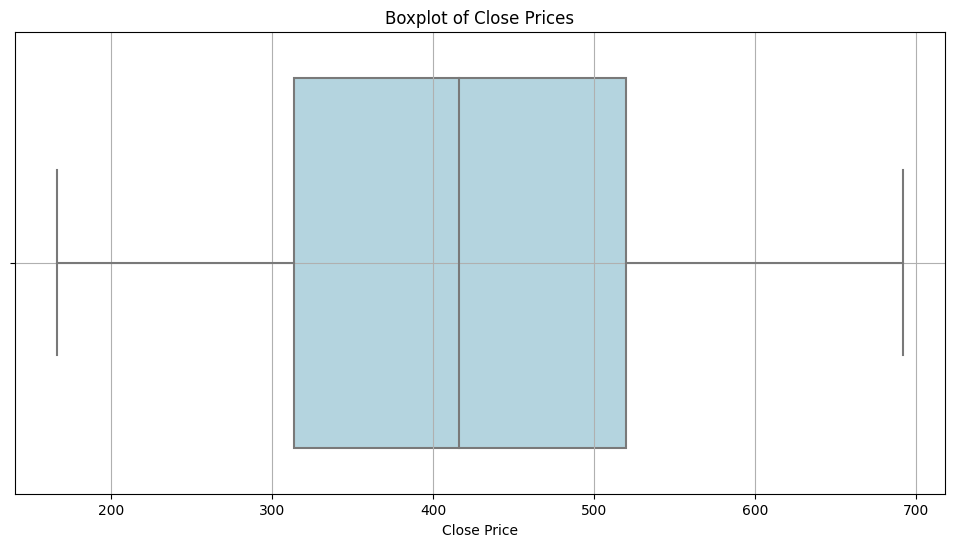

In [ ]:
# Create a boxplot
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(x=stock_1['Close'], color='lightblue')
plt.title('Boxplot of Close Prices')
plt.xlabel('Close Price')
plt.grid(True)
plt.show()

In [ ]:
differenced_series = data_diff['Close']

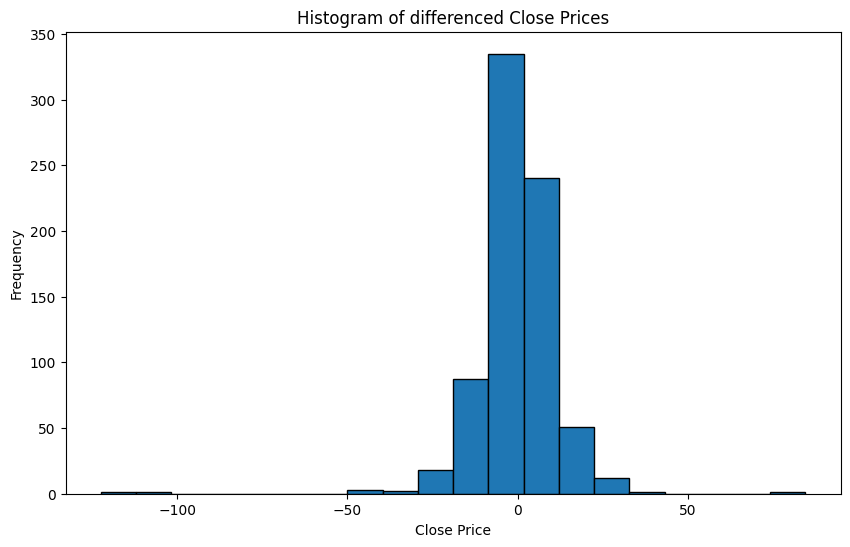

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(differenced_series, bins=20, edgecolor='k')

plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Histogram of differenced Close Prices')

plt.show()

By differencing it is normally distributed

**Model Identification**

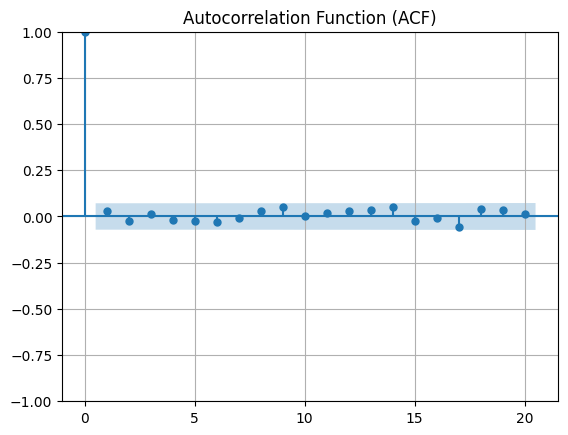

In [ ]:
plot_acf(differenced_series, lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.grid(True)
plt.show()

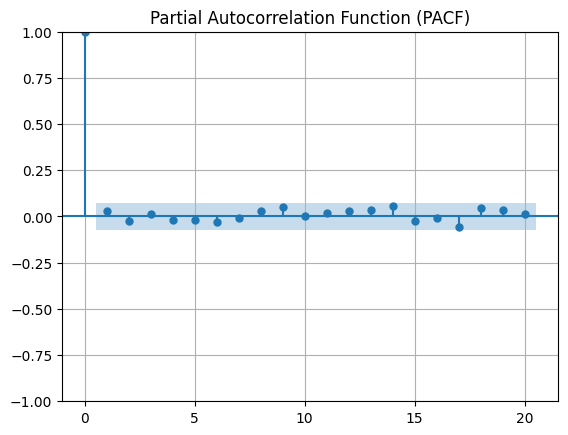

In [ ]:
plot_pacf(differenced_series, lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.grid(True)
plt.show()

By checking ACF and PACF plot of stationary data, it is clear that after differencing data became iid(independant and identical variables) variable which has no AR or MA component. ie, there is no trend and seasonality.
There is no significance corresponding to any lag.


In [ ]:
differenced_series

1      -5.299988
2     -36.369995
3      -3.819977
4       3.049988
5      -0.040009
         ...    
748   -12.630005
749    -7.390014
750    -4.729981
751    -5.520019
752     5.140014
Name: Close, Length: 752, dtype: float64

splitting the data into test and train data

In [ ]:
split_index = int(len(differenced_series) * 0.8)
train_data = differenced_series[:split_index]
test_data = differenced_series[split_index:]

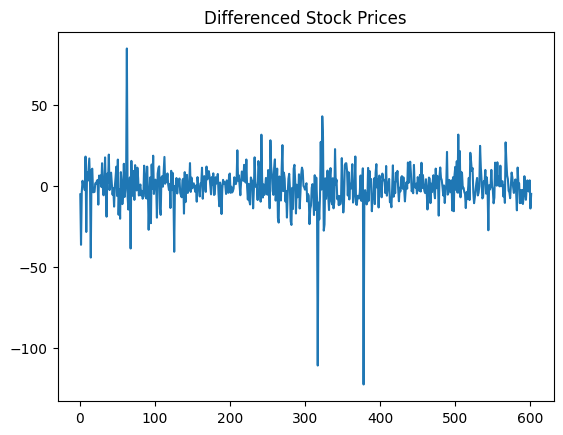

In [ ]:
plt.plot(train_data)
plt.title("Differenced Stock Prices")
plt.show()

In [ ]:
stock_1['Date'] = pd.to_datetime(stock_1['Date'])
stock_1.set_index('Date', inplace=True)

In [ ]:
train_size = int(len(stock_1) * 0.8)
train, test = stock_1[:train_size], stock_1[train_size:]

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**Exponential model**

In [ ]:
exp_model = ExponentialSmoothing(train, trend='add')
exp_fit = exp_model.fit()
exp_forecast = exp_fit.forecast(len(test))
exp_rmse = np.sqrt(mean_squared_error(test, exp_forecast))
print("Exponential Smoothing RMSE:", exp_rmse)

Exponential Smoothing RMSE: 136.0043273414718


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Quadratic model

In [ ]:
train['t'] = range(1, len(train) + 1)
test['t'] = range(len(train) + 1, len(train) + len(test) + 1)
quadratic_coeffs = np.polyfit(train['t'], train['Close'], 2)
quadratic_forecast = quadratic_coeffs[0] * test['t']**2 + quadratic_coeffs[1] * test['t'] + quadratic_coeffs[2]
quadratic_rmse = np.sqrt(mean_squared_error(test['Close'], quadratic_forecast))
print("Quadratic Model RMSE:", quadratic_rmse)

Quadratic Model RMSE: 295.8208637149044


<ipython-input-36-0614499f2815>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['t'] = range(1, len(train) + 1)
<ipython-input-36-0614499f2815>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['t'] = range(len(train) + 1, len(train) + len(test) + 1)


Additive Model

In [ ]:
additive_coeffs = np.polyfit(train['t'], train['Close'], 1)
additive_forecast = additive_coeffs[0] * test['t'] + additive_coeffs[1]
additive_rmse = np.sqrt(mean_squared_error(test['Close'], additive_forecast))
print("Additive Model RMSE:", additive_rmse)


Additive Model RMSE: 204.5647827873734


In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.8 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
auto_arima_model = auto_arima(
    train["Close"],
    start_p=0,
    start_q=0,
    max_p=10,
    max_q=10,
    m=12,
    start_P=0,
    seasonal=False,
    d=1,
    D=1,
    trace=True,
    error_action="ignore",
    suppress_warnings=True,
    stepwise=False
)




/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4740.125, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4741.871, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4743.646, Time=1.07 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4745.280, Time=1.20 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=4746.872, Time=1.21 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=4748.119, Time=1.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4741.880, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4743.323, Time=0.48 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4745.270, Time=0.66 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4747.142, Time=1.04 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=4.44 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4743.682, Time=0.72 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4745.268, Time=1.44 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4747.250, Time=4.60 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4742.712, Time=5.18 sec
 ARIMA(3,1,0)(0

By using Auto ARIMA function we get that best fit ARIMA model for the given data is ARIMA of (0,1,0)(0,0,0)[0] incercept